In [2]:
import pandas as pd
df = pd.read_excel('/content/survey data crsv.xlsx')


In [3]:
df.head()


,"Unique Identifier(used in consent form)\n\nTo ensure your responses remain anonymous while still allowing us to link your consent with survey data, please create a unique identifier. This identifier will help us match your responses without revealing your personal information.\n\nInstructions:\n1. Use the first two letters of your favorite color. (e.g., 'BL' for Blue, 'GR' for Green).\n2. Add the last two digits of your birth year. (e.g., '85' for 1985, '92' for 1992).\n3. Append the first letter of your mother's first name. (e.g., 'A' for Alice, 'M' for Mary).\n\nYour identifier should look something like 'BL85A' or 'GR92M'.\n\n\nThis method ensures your privacy and anonymity while allowing us to link your consent with your survey data effectively.",What is your age?,Are you aware of Ukrainian refugees in your local community?,Have you hosted or supported Ukrainian refugees in any way?,How much have you heard about CRSV being perpetrated in the context of the war in Ukraine?,Who do you think are the primary perpetrators of CRSV in the Ukrainian conflict?,"How do you think the Ukrainian public would react to reports of CRSV perpetrated against Ukrainian women, men, girls, or boys by individuals affiliated with Ukrainian state or non-state armed groups?","How do you think the international community would respond to reports of CRSV perpetrated by individuals affiliated with Ukrainian state or non-state armed groups, given the military aid being provided to Ukraine?","In Ukrainian culture, how acceptable do you think it is for survivors of CRSV to openly discuss their experiences?",How much do you think shame and stigma prevent survivors of CRSV in Ukraine from seeking help?,How do you think most Ukrainians would react to a friend or family member disclosing an experience of CRSV?,How accurately do you think CRSV in the Ukrainian conflict is portrayed in media and news reports?,"Do you think media coverage helps increase awareness and support for CRSV survivors, or reinforces harmful stereotypes?",What support services do you think are most needed for survivors of CRSV from Ukraine? (Select all that apply),Is there anything else you would like to share about this topic?
0,XX00A,35-44,Yes,No,A moderate amount,State armed groups,Very supportive of survivors,Express concern but continue military support,Somewhat acceptable,A lot,Listen but avoid discussing it further,Neutral,Strongly increases awareness and support,"Counseling and mental health support, Medical ...",NaN
1,PU01L,18-24,Yes,No,A great deal,State armed groups,Very supportive of survivors,Express concern but continue military support,Somewhat unacceptable,A great deal,Listen compassionately and help them seek support,Somewhat inaccurately,Somewhat increases awareness and support,"Counseling and mental health support, Medical ...",NaN
2,RE02B,18-24,Yes,"Yes, I have provided other support to refugees",A little,Unsure,Somewhat supportive of survivors,Express concern but continue military support,Neutral,A lot,Listen compassionately and help them seek support,Neutral,Somewhat reinforces harmful stereotypes,"Counseling and mental health support, Medical ...",NaN
3,MA70V,Over 45,Yes,No,A moderate amount,State armed groups,Somewhat supportive of survivors,Express concern but continue military support,Somewhat acceptable,A lot,Listen but avoid discussing it further,Neutral,Somewhat increases awareness and support,Housing and resettlement support,No
4,bL96s,25-34,Yes,"Yes, I have hosted refugees in my home",A moderate amount,Individuals unaffiliated with armed groups,Neutral,Express concern but continue military support,Very acceptable,A lot,Listen compassionately and help them seek support,Somewhat inaccurately,Neutral,"Counseling and mental health support, Financia...",NaN


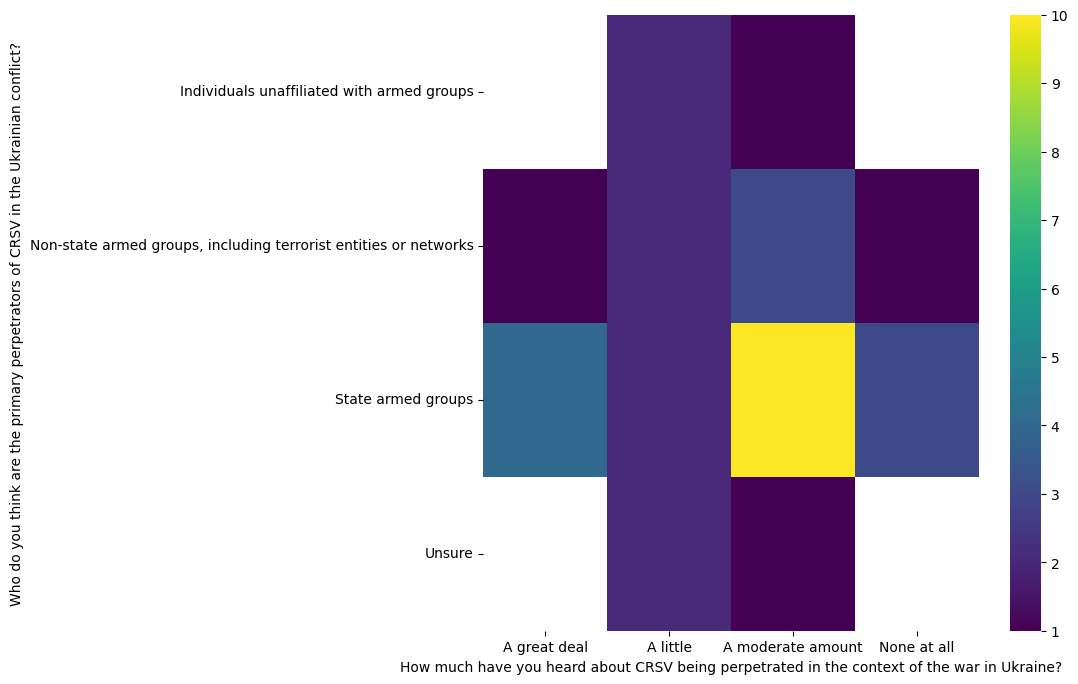

In [11]:
# @title How much have you heard about CRSV being perpetrated in the context of the war in Ukraine? vs Who do you think are the primary perpetrators of CRSV in the Ukrainian conflict?

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Who do you think are the primary perpetrators of CRSV in the Ukrainian conflict?'].value_counts()
    for x_label, grp in df.groupby('How much have you heard about CRSV being perpetrated in the context of the war in Ukraine?')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('How much have you heard about CRSV being perpetrated in the context of the war in Ukraine?')
_ = plt.ylabel('Who do you think are the primary perpetrators of CRSV in the Ukrainian conflict?')

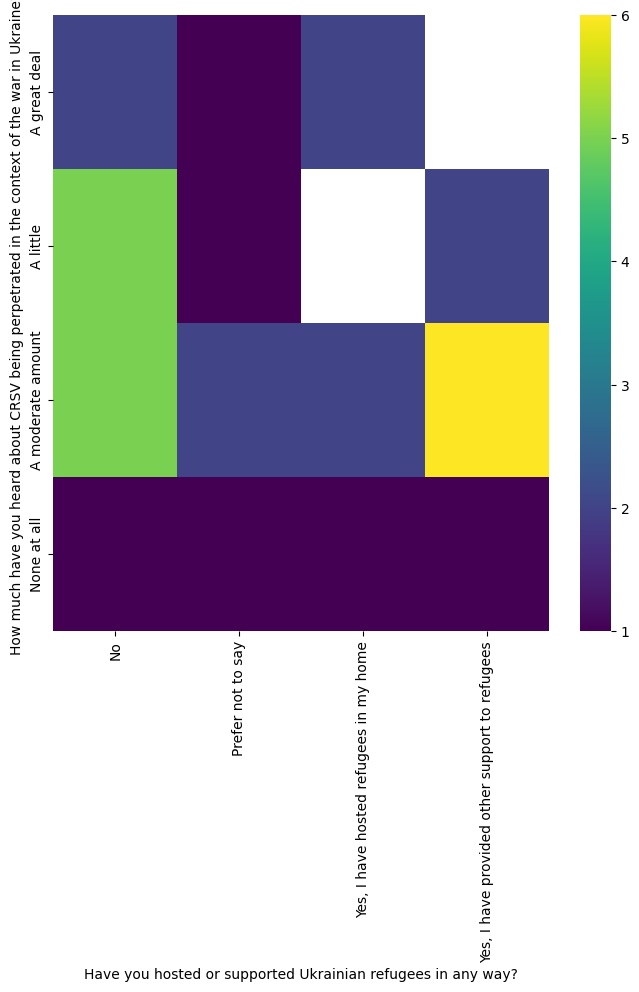

In [10]:
# @title Have you hosted or supported Ukrainian refugees in any way? vs How much have you heard about CRSV being perpetrated in the context of the war in Ukraine?

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['How much have you heard about CRSV being perpetrated in the context of the war in Ukraine?'].value_counts()
    for x_label, grp in df.groupby('Have you hosted or supported Ukrainian refugees in any way?')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Have you hosted or supported Ukrainian refugees in any way?')
_ = plt.ylabel('How much have you heard about CRSV being perpetrated in the context of the war in Ukraine?')

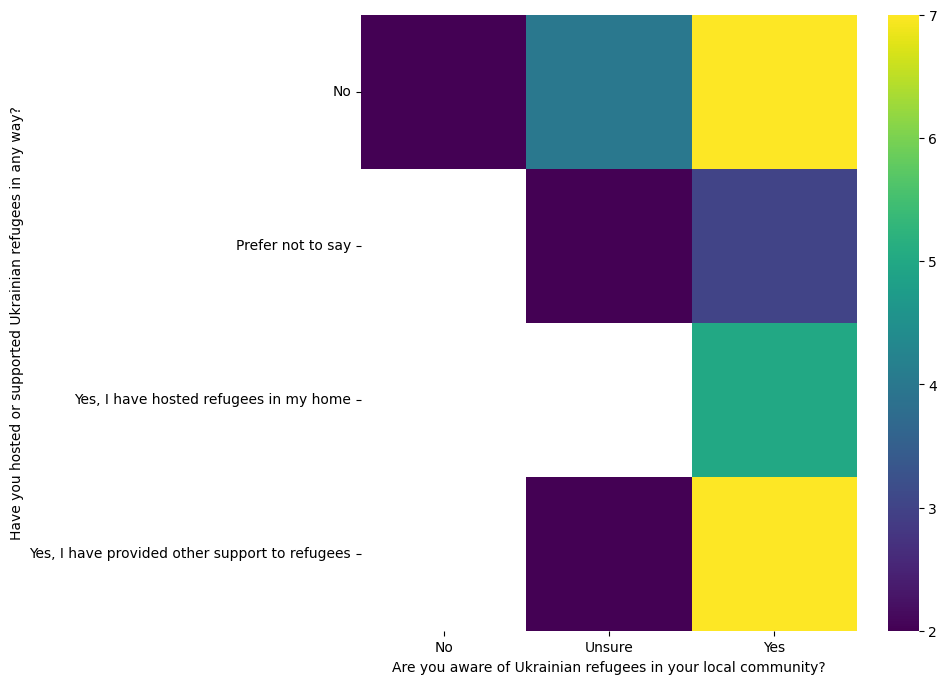

In [9]:
# @title Are you aware of Ukrainian refugees in your local community? vs Have you hosted or supported Ukrainian refugees in any way?

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Have you hosted or supported Ukrainian refugees in any way?'].value_counts()
    for x_label, grp in df.groupby('Are you aware of Ukrainian refugees in your local community?')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Are you aware of Ukrainian refugees in your local community?')
_ = plt.ylabel('Have you hosted or supported Ukrainian refugees in any way?')

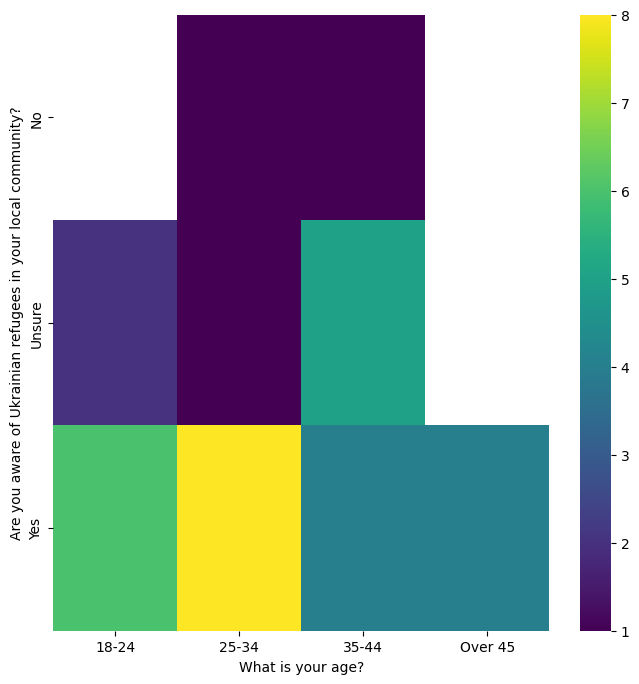

In [8]:
# @title What is your age? vs Are you aware of Ukrainian refugees in your local community?

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Are you aware of Ukrainian refugees in your local community?'].value_counts()
    for x_label, grp in df.groupby('What is your age?')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('What is your age?')
_ = plt.ylabel('Are you aware of Ukrainian refugees in your local community?')

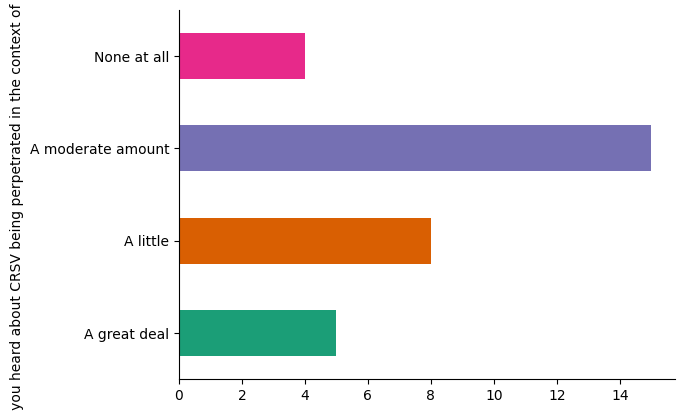

In [7]:
# @title How much have you heard about CRSV being perpetrated in the context of the war in Ukraine?

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('How much have you heard about CRSV being perpetrated in the context of the war in Ukraine?').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

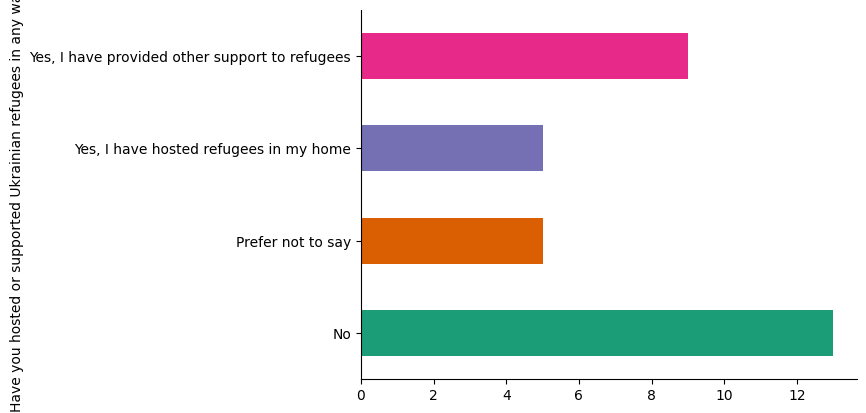

In [6]:
# @title Have you hosted or supported Ukrainian refugees in any way?

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Have you hosted or supported Ukrainian refugees in any way?').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

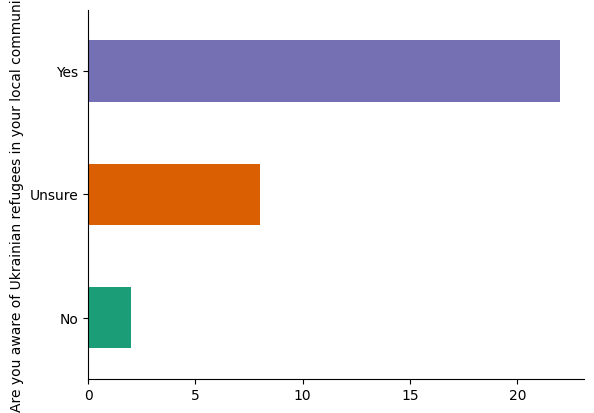

In [5]:
# @title Are you aware of Ukrainian refugees in your local community?

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Are you aware of Ukrainian refugees in your local community?').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

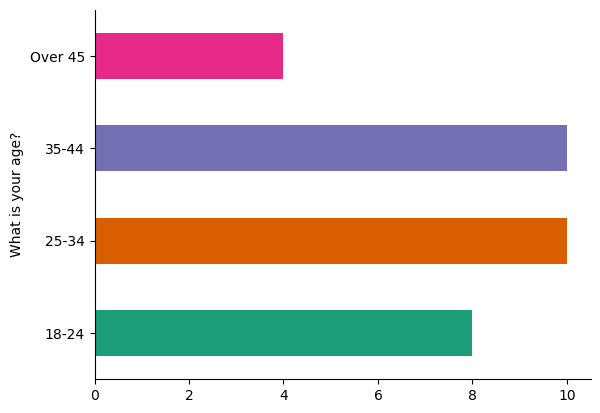

In [4]:
# @title What is your age?

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('What is your age?').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

Chi-Square Test for Independence

In [13]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['In Ukrainian culture, how acceptable do you think it is for survivors of CRSV to openly discuss their experiences?'],
                                df['How do you think most Ukrainians would react to a friend or family member disclosing an experience of CRSV?'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}, p-value: {p}")


Chi-Square Statistic: 5.736961451247166, p-value: 0.9287566962769829


Logistic Regression
Use logistic regression to model the probability of CRSV survivors being silenced based on various factors.

In [18]:
import pandas as pd

# Load the data
df = pd.read_excel('survey data crsv.xlsx')

# Define the columns to be used
columns = ['In Ukrainian culture, how acceptable do you think it is for survivors of CRSV to openly discuss their experiences?',
           'How do you think most Ukrainians would react to a friend or family member disclosing an experience of CRSV?',
           'Are you aware of Ukrainian refugees in your local community?',
           'Have you hosted or supported Ukrainian refugees in any way?']

# Create a subset of the data with the relevant columns
df_subset = df[columns].copy()

# Aggregate the categorical responses
aggregated_data = df_subset.apply(pd.Series.value_counts).fillna(0)





                                                   In Ukrainian culture, how acceptable do you think it is for survivors of CRSV to openly discuss their experiences?  \
Express doubt or blame the victim                                                                0.0                                                                    
Listen but avoid discussing it further                                                           0.0                                                                    
Listen compassionately and help them seek support                                                0.0                                                                    
Neutral                                                                                          6.0                                                                    
No                                                                                               0.0                                                       

In [21]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the data
df = pd.read_excel('survey data crsv.xlsx')

# Define the columns to be used
columns = ['In Ukrainian culture, how acceptable do you think it is for survivors of CRSV to openly discuss their experiences?',
           'How do you think most Ukrainians would react to a friend or family member disclosing an experience of CRSV?',
           'Are you aware of Ukrainian refugees in your local community?',
           'Have you hosted or supported Ukrainian refugees in any way?']

# Create a subset of the data with the relevant columns
df_subset = df[columns].copy()

# Encode the target variable (silencing)
df_subset['silencing'] = df_subset['How do you think most Ukrainians would react to a friend or family member disclosing an experience of CRSV?'].apply(lambda x: 1 if 'avoid' in x else 0)

# Encode the stigma variable
df_subset['stigma'] = df_subset['In Ukrainian culture, how acceptable do you think it is for survivors of CRSV to openly discuss their experiences?'].apply(lambda x: 1 if 'unacceptable' in x else 0)

# Encode categorical variables as numeric
df_subset_encoded = pd.get_dummies(df_subset.drop(columns=['How do you think most Ukrainians would react to a friend or family member disclosing an experience of CRSV?',
                                                           'In Ukrainian culture, how acceptable do you think it is for survivors of CRSV to openly discuss their experiences?']),
                                   drop_first=True)

# Define the independent variables and dependent variable
X = df_subset_encoded.drop(columns=['silencing'])
y = df_subset_encoded['silencing']

# Ensure all data is numeric
X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

# Drop any remaining NaN values
X = X.dropna()
y = y[X.index]

# Add a constant to the model (intercept)
X = sm.add_constant(X)

# Ensure no object dtype remains
X = np.asarray(X, dtype=np.float64)
y = np.asarray(y, dtype=np.float64)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Display the summary of the model
print(model.summary())



         Current function value: 0.589203
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   32
Model:                          Logit   Df Residuals:                       25
Method:                           MLE   Df Model:                            6
Date:                Thu, 20 Jun 2024   Pseudo R-squ.:                  0.1402
Time:                        18:01:39   Log-Likelihood:                -18.855
converged:                      False   LL-Null:                       -21.930
Covariance Type:            nonrobust   LLR p-value:                    0.4065
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.9951   4.22e+04     -0.001      1.000   -8.28e+04    8.28e+04
x1             0.6602      0.983      0.672      0.502      -1.26

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
